PYMACEUTICALS INC

In [ ]:
Analysis:


In [1]:
# CELL 1 OF HW
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
ms_df=pd.merge(study_results,mouse_metadata,on="Mouse ID",how="left")

# Display the data table for preview
ms_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
ms_df.shape

(1893, 8)

In [3]:
mouse_metadata.describe

<bound method NDFrame.describe of     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]>

In [4]:
study_results.describe

<bound method NDFrame.describe of      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0           45.000000                 0
4        c819          0           45.000000                 0
...       ...        ...                 ...               ...
1888     r944         45           41.581521                 2
1889     u364         45           31.023923                 3
1890     p438         45           61.433892                 1
1891     x773         45           58.634971                 4
1892     b879         45           72.555239                 2

[1893 rows x 4 columns]>

In [5]:
#print out head of mouse dataframe to determine "how" of merge
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [6]:
#print out head of study dataframe to determine "how" of merge
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [7]:
# Cell 2 of HW
# Checking the number of mice.
num_mice=len(ms_df["Mouse ID"].unique())
num_mice

249

In [8]:
# Cell 3 of HW
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates=ms_df["Mouse ID"].value_counts()
duplicates

Mouse ID
g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: count, Length: 249, dtype: int64

In [9]:
# Cell 3 of HW
ms_df.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

In [10]:
# Cell 4 of HW
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows = ms_df.loc[ms_df["Mouse ID"]=="g989"]
duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

dropped_df=ms_df[ms_df["Mouse ID"]!="g989"]
dropped_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [12]:
# Cell 6 of HW
# Checking the number of mice in the clean DataFrame.
mice=dropped_df["Mouse ID"].value_counts()
print(len(mice))


248


SUMMARY STATISTICS

In [13]:
dropped_df.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

In [14]:
# Cell 7 of HW
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

d_regimen=dropped_df.groupby(["Drug Regimen"])
tumor_mean=dropped_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_med=dropped_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_var=dropped_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_sd=dropped_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_se=dropped_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


summary_df=pd.DataFrame({"Mean Tumor Volume": tumor_mean,
                         "Median Tumor Volume": tumor_med,
                         "Tumor Volume Variance": tumor_var,
                         "Tumor Volume Std. Dev.": tumor_sd,
                         "Tumor volume Std. Err.": tumor_se})
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Cell 8 of HW
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

adv_summary=dropped_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var', 'std', 'sem'])
adv_summary                            


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


BAR AND PIE CHARTS

In [16]:
# Cell 9 of HW
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timeptsct=dropped_df["Drug Regimen"].value_counts()
timeptsct

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

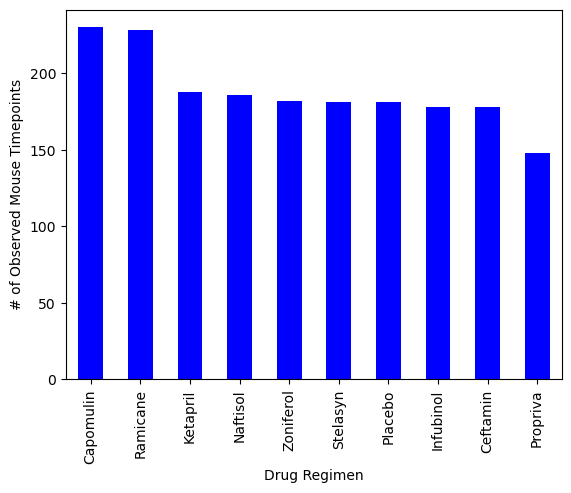

In [17]:
# Cell 9 of HW
figure1=timeptsct.plot(kind="bar", facecolor="blue",
                        xlabel="Drug Regimen",
                        ylabel="# of Observed Mouse Timepoints")




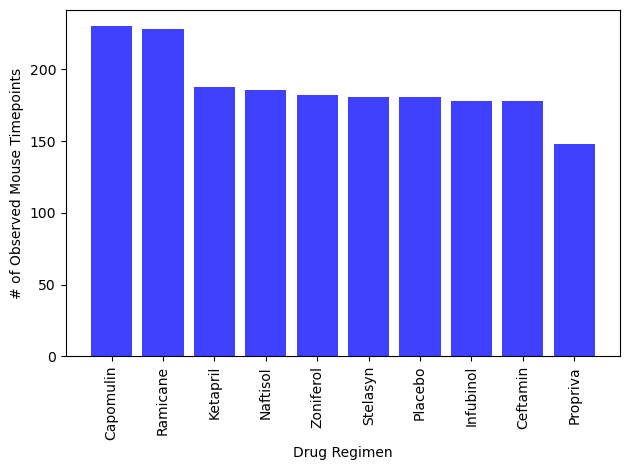

In [18]:
# Cell 10 of HW
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x=np.arange(len(d_regimen))
y=timeptsct

plt.bar(x,y, color="blue",alpha=0.75,align="center")
tick_locations=[value for value in x]
plt.xticks(tick_locations,["Capomulin","Ramicane","Ketapril",
                           "Naftisol","Zoniferol","Stelasyn",
                           "Placebo","Infubinol","Ceftamin",
                           "Propriva"], rotation="vertical")

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout();

In [19]:
#Cell 11 of HW
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gen=dropped_df["Sex"].value_counts()
gen

Sex
Male      958
Female    922
Name: count, dtype: int64

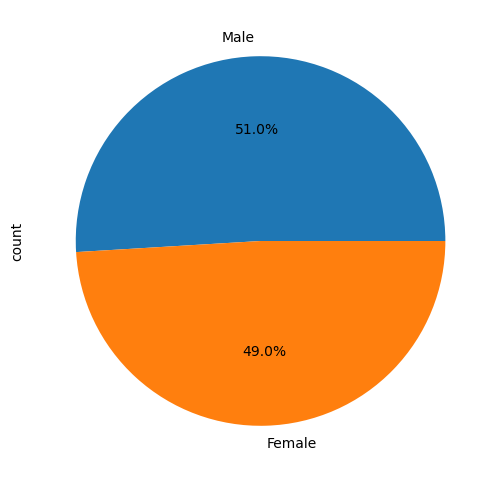

In [20]:
#Cell 11 of HW
fig2=gen.plot.pie(figsize=(6,6), autopct="%.1f%%")

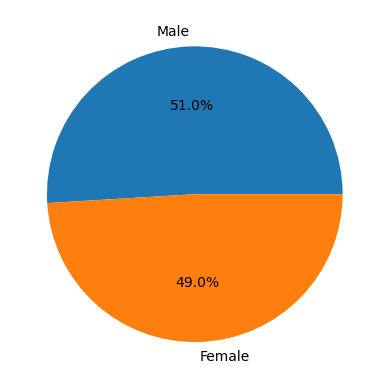

In [21]:
#Cell 12 of HW
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pies=["Male","Female"]
counts=[958,922]
plt.pie(counts,labels=pies,autopct="%1.1f%%");

QUARTILES, OUTLIERS AND BOXPLOTS

In [22]:
#Cell 13 of HW
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_tp=dropped_df.groupby(["Mouse ID"]).max()["Timepoint"]
new_dropped_df=mouse_tp.reset_index()
new_dropped_df




,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [23]:
#Cell 13 of HW
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
maxtp_dropped_df=pd.merge(dropped_df,mouse_tp,on=["Mouse ID","Timepoint"],how="right")
maxtp_dropped_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [24]:
#Cell 14 of HW
# Put treatments into a list for for loop (and later for plot labels)
treats=['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tum_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in treats:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    rows=maxtp_dropped_df.loc[maxtp_dropped_df["Drug Regimen"]==i,"Tumor Volume (mm3)"]
    quartiles = rows.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"The lower quartile of {i} is: {lowerq}")
    print(f"The upper quartile of {i} is: {upperq}")
    print(f"The interquartile range of {i} is: {iqr}")
    print(f"The the median of {i} is: {quartiles[0.5]}")
    print(f"{i}'s potential outliers could be below {lower_bound}.")
    print(f"{i}'s potential outliers could be above {upper_bound}.")
    print(f"------------------------------------------------------------")
    # add subset
    tum_vol.append(rows)
  

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.1251644
Capomulin's potential outliers could be below 20.70456164999999.
Capomulin's potential outliers could be above 51.83201549.
------------------------------------------------------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229
Ramicane's potential outliers could be below 17.912664470000003.
Ramicane's potential outliers could be above 54.30681135.
------------------------------------------------------------
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046
Infubinol's potential outliers could be

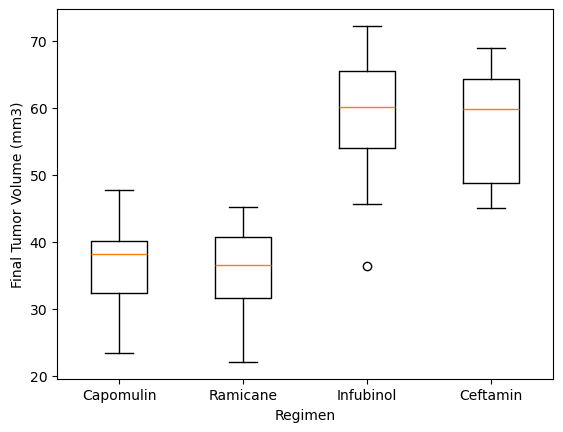

In [25]:
#Cell 15 of HW
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#Xpert Learning assistant helped with trying to assign lables to the xticks
treats=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
x_values=[1, 2, 3, 4]
fig=plt.figure()
plt.xlabel("Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.boxplot(tum_vol)
plt.xticks(x_values,treats);



LINE AND SCATTER PLOTS

In [26]:
#Cell 16 of HW
#figuring out which dataframe I need to pull mouse l509 from
i509=maxtp_dropped_df[maxtp_dropped_df["Mouse ID"]=="l509"]
i509

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
108,l509,45,41.483008,3,Capomulin,Male,17,21


In [27]:
#Cell 16 of HW
#figuring out which dataframe I need to pull mouse l509 from
d509=dropped_df.loc[dropped_df["Mouse ID"]=="l509"]
d509

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


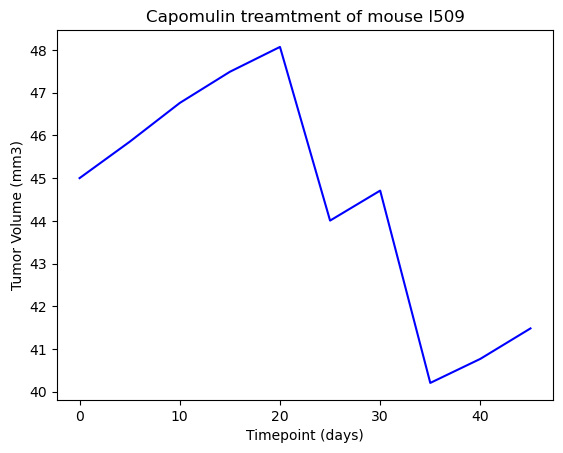

In [28]:
#Cell 16 of HW
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

vol=dropped_df.loc[dropped_df["Mouse ID"]=="l509","Tumor Volume (mm3)"]
tmp=dropped_df.loc[dropped_df["Mouse ID"]=="l509","Timepoint"]
fig1=plt.plot(tmp,vol, color="blue")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treamtment of mouse l509")
plt.show();

In [29]:
vol

231     45.000000
253     45.851193
539     46.759074
881     47.488599
982     48.070452
1146    44.006257
1414    44.708055
1499    40.207288
1723    40.770813
1771    41.483008
Name: Tumor Volume (mm3), dtype: float64

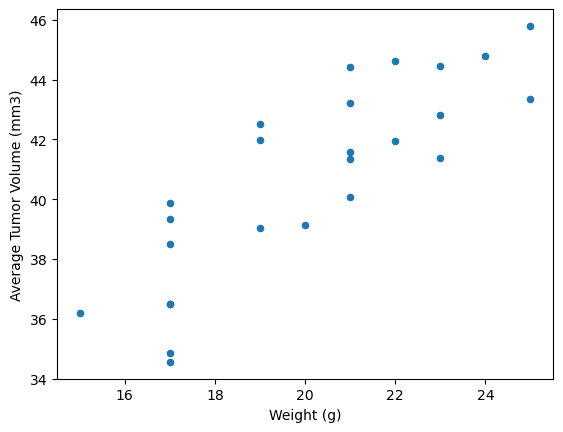

In [30]:
#Cell 17 of HW
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter Dataframe for Capomulin regimen

c_only=dropped_df.loc[dropped_df["Drug Regimen"]=="Capomulin"]
# Calculated avg tumor volume for each mouse
avg_tvol=c_only.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
scatter=pd.DataFrame({"Weight":c_only.groupby("Mouse ID")["Weight (g)"].mean(),"Average Tumor Volume":avg_tvol})

scat1=scatter.plot(kind="scatter",x="Weight", y="Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show();

CORRELATION AND REGRESSION

The correlation between mouse weight and the average tumor volume is 0.84


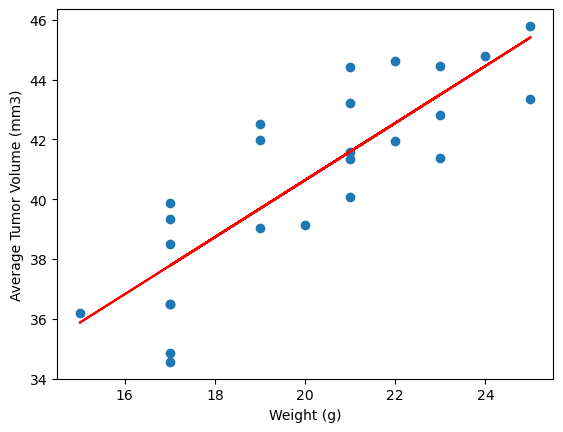

In [33]:
#Cell 18 of HW
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = scatter['Weight']
y_values = scatter['Average Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}")